In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

exp = 'exp9'
with open(exp + '_unlabeled.out') as fh:
    out = fh.read()

out = re.split(r'\n', out)

dict_list = [eval(d) for d in out]
df = pd.DataFrame(dict_list)

df['lipton-excess'] = df['lipton'] - df['bayes_error']
df['oracle-excess'] = df['oracle'] - df['bayes_error']

measure = ['lipton-excess', 'oracle-excess']
agg_dict = dict()
for key in measure:
    agg_dict[key] = ['mean', 'std']
result = df.groupby(['n_source', 'n_target'], as_index=False).agg(agg_dict)

result

n_source n_target lipton-excess           oracle-excess          
                              mean       std          mean       std
0        25      100      0.175138  0.022707      0.181296  0.062786
1        50       10      0.200894  0.116317      0.154414  0.024880
2        50       20      0.152353  0.023599      0.152125  0.023402
3        50       40      0.162043  0.045139      0.157840  0.022274
4        50       80      0.152409  0.020772      0.152355  0.020676
5        50      100      0.156301  0.022558      0.156249  0.022418
6        50      160      0.160030  0.022188      0.159929  0.022153
7        50      320      0.155756  0.023852      0.155600  0.023657
8        50      640      0.153880  0.020268      0.153829  0.020294
9        50     1280      0.151636  0.021951      0.151384  0.021738
10       50     2560      0.156502  0.018364      0.156327  0.018380
11       50     5120      0.153097  0.022533      0.152945  0.022479
12      100      100      0.130220  0.018990      0.129564  0.019679
13      200      100      0.104021  0.017076      0.103769  0.017128
14      400      100      0.081677  0.016544      0.081551  0.016414
15      800      100      0.060471  0.012913      0.060445  0.012994
16     1600      100      0.045920  0.013334      0.045840  0.013050
17     3200      100      0.035753  0.011486      0.035831  0.011577
18     6400      100      0.024843  0.011221      0.025024  0.011557
19    12800      100      0.018869  0.008689      0.018469  0.008765

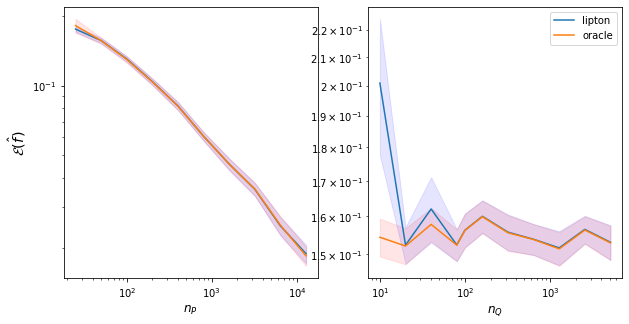

In [2]:
result1 = result.loc[result['n_target'] == 100]
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
n, mean, std = result1['n_source'], result1['lipton-excess']['mean'], result1['lipton-excess']['std']
mean_o, std_o = result1['oracle-excess']['mean'], result1['oracle-excess']['std']
l1 = ax[0].plot(n,mean)
l2 = ax[0].plot(n,mean_o)
ax[0].fill_between(n, (mean-2 * std/10), (mean+2 * std/10), color='b', alpha=.1)
ax[0].fill_between(n, (mean_o-2 * std_o/10), (mean_o+2 * std_o/10), color='r', alpha=.1)
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].set_ylabel('$\\mathcal{E}(\\hat f)$', size = 'x-large')
ax[0].set_xlabel('$n_P$', size = 'large')

result2 = result.loc[result['n_source'] == 50]

n, mean, std = result2['n_target'], result2['lipton-excess']['mean'], result2['lipton-excess']['std']
mean_o, std_o = result2['oracle-excess']['mean'], result2['oracle-excess']['std']
ax[1].plot(n,mean)
ax[1].plot(n,mean_o)
ax[1].fill_between(n, (mean-2 * std/10), (mean+2 * std/10), color='b', alpha=.1)
ax[1].fill_between(n, (mean_o-2 * std_o/10), (mean_o+2 * std_o/10), color='r', alpha=.1)
ax[1].set_yscale('log')
ax[1].set_xscale('log')
#ax[1].set_ylabel('$\\mathcal{E}(\\hat f)$', size = 'x-large')
ax[1].set_xlabel('$n_Q$', size = 'large')
#plt.legend(['lipton', 'oracle'], loc = 'bottom')

plt.legend(('lipton', 'oracle'), loc='middle left')
plt.show()

In [3]:
with open(exp + '_labeled.out') as fh:
    out = fh.read()

out = re.split(r'\n', out)

dict_list = [eval(d) for d in out]
df = pd.DataFrame(dict_list)

df['classical-excess'] = df['classical'] - df['bayes_error']
df['labeled-excess'] = df['labeled'] - df['bayes_error']

measure = ['classical-excess', 'labeled-excess']
agg_dict = dict()
for key in measure:
    agg_dict[key] = ['mean', 'std']
result = df.groupby(['n_source', 'n_target'], as_index=False).agg(agg_dict)

result

n_source n_target classical-excess           labeled-excess          
                                 mean       std           mean       std
0        50      150         0.152148  0.018513       0.129068  0.017662
1        50      350         0.128264  0.020407       0.116453  0.019974
2        50      750         0.096761  0.015858       0.091761  0.016299
3        50     1550         0.075220  0.014565       0.073145  0.014960
4        50     3150         0.056611  0.014121       0.055661  0.013960
5        50     6350         0.040268  0.010962       0.039939  0.010728
6        50    12750         0.029050  0.011062       0.028975  0.010981
7       150       50         0.190174  0.022716       0.115889  0.017427
8       350       50         0.188968  0.024479       0.087973  0.017413
9       750       50         0.182719  0.021435       0.062569  0.014370
10     1550       50         0.183800  0.024754       0.046825  0.010569
11     3150       50         0.188825  0.024307       0.034025  0.010998
12     6350       50         0.183215  0.023250       0.025440  0.012362
13    12750       50         0.184471  0.023133       0.018663  0.008743

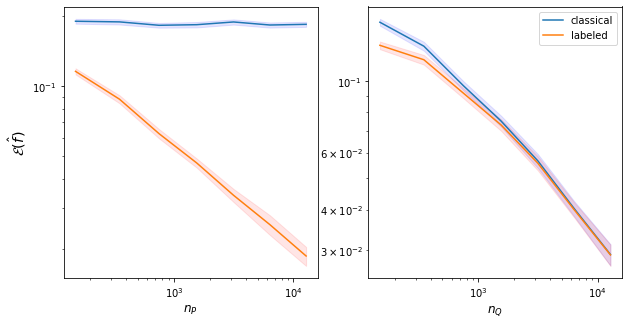

In [4]:
result1 = result.loc[result['n_target'] == 50]
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
n, mean, std = result1['n_source'], result1['classical-excess']['mean'], result1['classical-excess']['std']
mean_o, std_o = result1['labeled-excess']['mean'], result1['labeled-excess']['std']
l1 = ax[0].plot(n,mean)
l2 = ax[0].plot(n,mean_o)
ax[0].fill_between(n, (mean-2 * std/10), (mean+2 * std/10), color='b', alpha=.1)
ax[0].fill_between(n, (mean_o-2 * std_o/10), (mean_o+2 * std_o/10), color='r', alpha=.1)
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].set_ylabel('$\\mathcal{E}(\\hat f)$', size = 'x-large')
ax[0].set_xlabel('$n_P$', size = 'large')

result2 = result.loc[result['n_source'] == 50]

n, mean, std = result2['n_target'], result2['classical-excess']['mean'], result2['classical-excess']['std']
mean_o, std_o = result2['labeled-excess']['mean'], result2['labeled-excess']['std']
ax[1].plot(n,mean)
ax[1].plot(n,mean_o)
ax[1].fill_between(n, (mean-2 * std/10), (mean+2 * std/10), color='b', alpha=.1)
ax[1].fill_between(n, (mean_o-2 * std_o/10), (mean_o+2 * std_o/10), color='r', alpha=.1)
ax[1].set_yscale('log')
ax[1].set_xscale('log')
#ax[1].set_ylabel('$\\mathcal{E}(\\hat f)$', size = 'x-large')
ax[1].set_xlabel('$n_Q$', size = 'large')
#plt.legend(['lipton', 'oracle'], loc = 'bottom')

plt.legend(('classical', 'labeled'), loc='middle left')
plt.show()